In [3]:
cd /Users/paavankumars/Desktop/ML

/Users/paavankumars/Desktop/ML


In [4]:
ls

25_may_ml.ipynb               emailspam_ml.ipynb
Iris (3).csv                  heart.csv
ML_2.ipynb.webloc             ml.ipynb
ML_Housingprice.ipynb.webloc  ml4.ipynb
ML_lab3.ipynb.webloc          music.csv
Untitled.ipynb                play.csv
email.csv


In [19]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
dataframe = pd.read_csv('email.csv')

In [21]:
dataframe.head(10)

,x0,x1,x2,x3,x4,x5,class
0,1,1,1,0,1,1,1
1,1,0,0,1,1,0,0
2,1,0,1,1,0,0,1
3,1,1,0,0,1,0,0
4,1,1,0,1,0,1,1
5,0,1,1,1,1,0,0
6,1,1,1,0,1,1,1
7,1,0,0,1,1,0,0
8,1,0,1,1,0,0,1
9,1,1,0,0,1,0,0


In [22]:
dataframe.isnull().sum()

x0       0
x1       0
x2       0
x3       0
x4       0
x5       0
class    0
dtype: int64

In [23]:
dataframe.describe()

,x0,x1,x2,x3,x4,x5,class
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,0.833333,0.666667,0.388889,0.666667,0.666667,0.333333,0.500000
std,0.383482,0.485071,0.501631,0.485071,0.485071,0.485071,0.514496
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.500000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [24]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   x0      18 non-null     int64
 1   x1      18 non-null     int64
 2   x2      18 non-null     int64
 3   x3      18 non-null     int64
 4   x4      18 non-null     int64
 5   x5      18 non-null     int64
 6   class   18 non-null     int64
dtypes: int64(7)
memory usage: 1.1 KB


In [25]:
dataframe.corr()

,x0,x1,x2,x3,x4,x5,class
x0,1.000000e+00,4.487499e-17,-0.560612,-3.850730e-17,-8.678126e-17,5.980464e-18,-1.490712e-01
x1,4.487499e-17,1.000000e+00,-0.161165,-5.000000e-01,2.500000e-01,5.000000e-01,2.616821e-17
x2,-5.606119e-01,-1.611646e-01,1.000000,-1.611646e-01,-1.611646e-01,1.611646e-01,5.698029e-01
x3,-3.850730e-17,-5.000000e-01,-0.161165,1.000000e+00,-5.000000e-01,-2.500000e-01,0.000000e+00
x4,-8.678126e-17,2.500000e-01,-0.161165,-5.000000e-01,1.000000e+00,-2.500000e-01,-7.071068e-01
x5,5.980464e-18,5.000000e-01,0.161165,-2.500000e-01,-2.500000e-01,1.000000e+00,7.071068e-01
class,-1.490712e-01,2.616821e-17,0.569803,0.000000e+00,-7.071068e-01,7.071068e-01,1.000000e+00


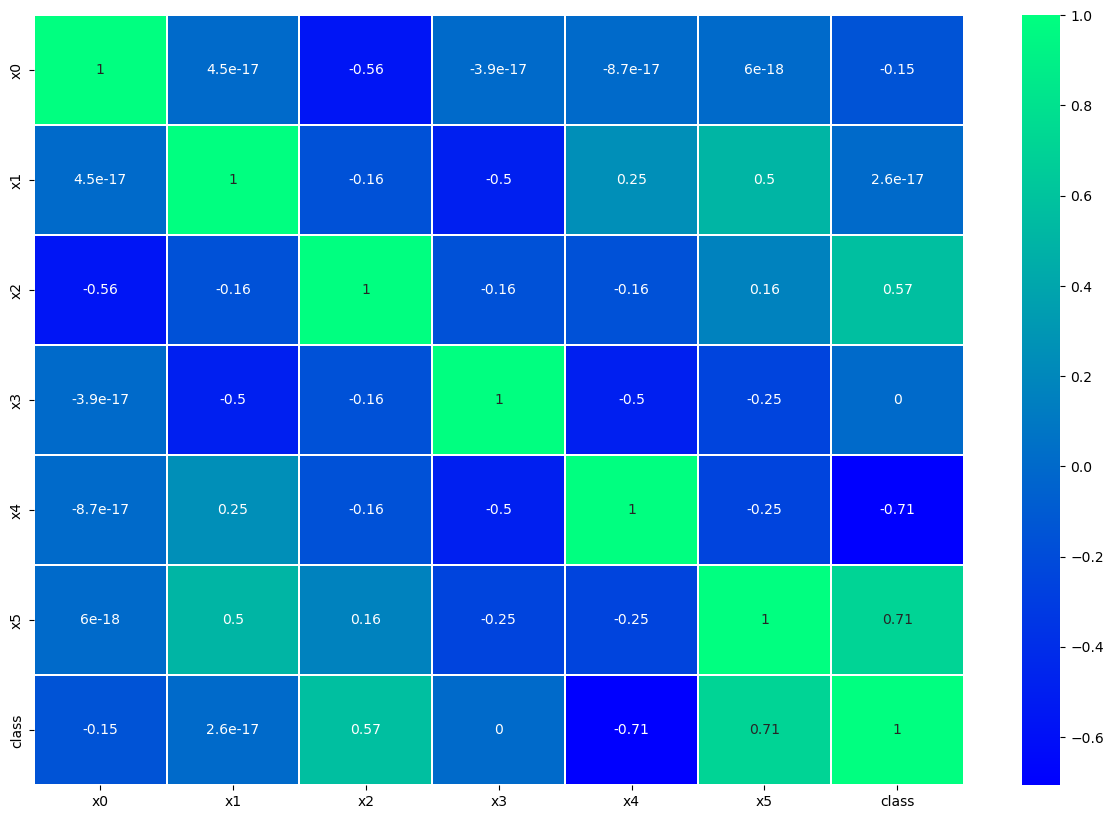

In [26]:
plt.figure(figsize=(15,10))
sns.heatmap(dataframe.corr(),linewidth=0.01,annot=True,cmap="winter")
plt.show()

In [27]:
X = dataframe.iloc[:,1:9] 
y = dataframe.iloc[:,-1]
X = X.values
y = y.values

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [29]:
X_std=StandardScaler().fit_transform(X)
X_train,X_test,y_train,y_test=train_test_split(X_std,y,test_size=0.25,random_state=40)

Testing Accuracy for Logistic Regression: 1.0


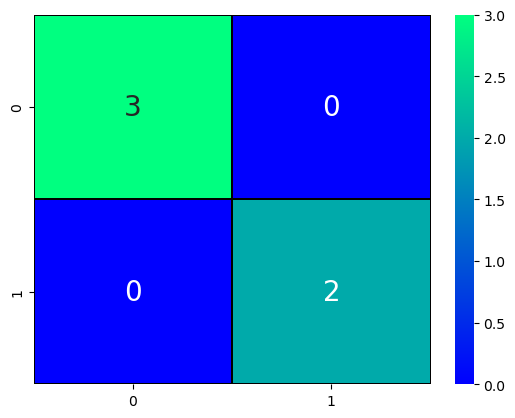

In [31]:
lr=LogisticRegression(C=1.0,class_weight='balanced',dual=False, fit_intercept=True, intercept_scaling=1, max_iter=100, multi_class='auto', n_jobs=None,penalty='l2', random_state=1234, solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)
model1=lr.fit(X_train,y_train) 
prediction1=model1.predict(X_test)
cm=confusion_matrix(y_test,prediction1) 
sns.heatmap(cm,annot=True,cmap='winter',linewidths=0.3,
linecolor='black',annot_kws={"size":20})
TP=cm[0][0] 
TN=cm[1][1] 
FN=cm[1][0] 
FP=cm[0][1]
print('Testing Accuracy for Logistic Regression:',(TP+TN)/(TP+TN+FN+FP))